# Kernel Density Estimation

Non-parametric method to estimate the probability density function (PDF) of a random variable. The Kernel function is evaluated for each data point, and these partial results are summed to obtain the KDE.

Important hyperparameters:

-  **Kernel:** Determines the shape of the kernel function used to estimate the density. (E.g. Gaussian, Epanechnikov, Beta etc.)
-  **Bandwidth:** Controls the smoothness of the estimated density function. (Lower bandwidths result in more wiggly/undersmoothed density functions, while higher bandwidths result in smoother/oversmoothed density functions.)


## Steps in KDE

1) Kernel Function for a Single Data Point

KDE uses a kernel function to estimate the probability density at a given point. For a single data point $x_i$ , the kernel function $K(x)$ is often chosen to be a smooth, symmetric function such as a Gaussian:

$K(x) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right)$

The kernel function ensures the resulting probability density function (PDF) integrates to 1.

2) Scaling and Shifting the Kernel Function

If we take a single data point, $x_i$, from our dataset $X$, it can be shifted to be centered at $x_i$ by subtracting $x_i$ from the data point $x$. To make the curver wider or narrower, we can divide the shifted data point by a constant scaling factor $h$m which is the bandwidth, a hyperparameter of the KDE.

$\frac{1}{h}K(\frac{x-x_i}{h})$

Dividing by $h$ is used to make the area under the curve equal to 1 since the area under the kernel function is multiplied by $h$.

3) Constructing PDF for multiple data points

The PDF for a dataset $X = \{x_1, x_2, \ldots, x_n\}$ is estimated by summing the contributions of kernels centered at each data point. This ensures the overall density integrates to 1.

$f(x) = \frac{\frac{1}{h}K(\frac{x-x_1}{h}) + \frac{1}{h}K(\frac{x-x_2}{h}) + ... + \frac{1}{h}K(\frac{x-x_n}{h})}{n}$ (Divide by n to normalize the area under the curve to 1)

The full signature of the KDE function is:

$f(x; X, h) = \frac{1}{n} \sum_{i=1}^n \frac{1}{h} K\left(\frac{x - x_i}{h}\right)$






## Anomaly Detection with KDE

1) Fit a KDE model to a dataset with appropriate bandwidth and kernel using GridSearch or CrossValidation
2) Calculate the probability density $f(x)$ for each data point
3) Set a threshold $T$ for anomaly detection where points with $f(x)<T$ are considered anomalies
4) Anomalies Identifed as regions of low density below the threshold $T$

In [1]:
# import pkgs
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def exp_func(x):
    return np.exp(-(x**2))


def normal_func(x):
    return 1 / (np.sqrt(2 * np.pi)) * np.exp(-(x**2) / 2)


def plot_graph(
    x: np.ndarray, y: np.ndarray, title: str = "Plot of $e^{-x^2}$", label=r"$e^{-x^2}$"
):
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=label, color="blue")
    plt.title(title, fontsize=14)
    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
    plt.grid(alpha=0.3)
    plt.legend(fontsize=12)
    plt.show()

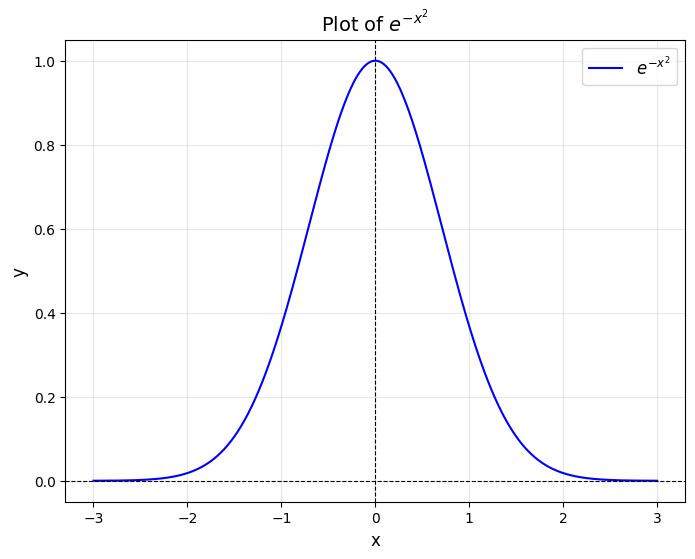

In [14]:
# Generate x values
x = np.linspace(-3, 3, 500)
y = exp_func(x)
plot_graph(x, y)

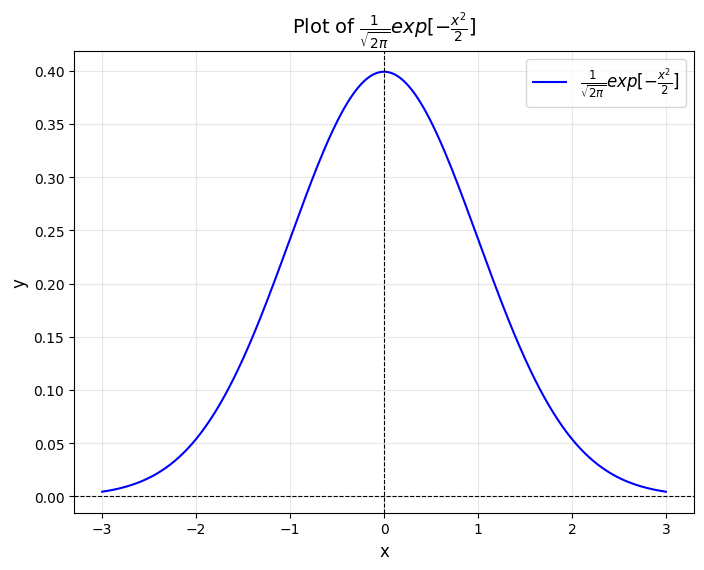

In [17]:
y = normal_func(x)
plot_graph(
    x,
    y,
    title="Plot of $\\frac{1}{\\sqrt{2\\pi}} exp[-\\frac{x^2}{2}]$",
    label=r"$\frac{1}{\sqrt{2\pi}} exp[-\frac{x^2}{2}]$",
)

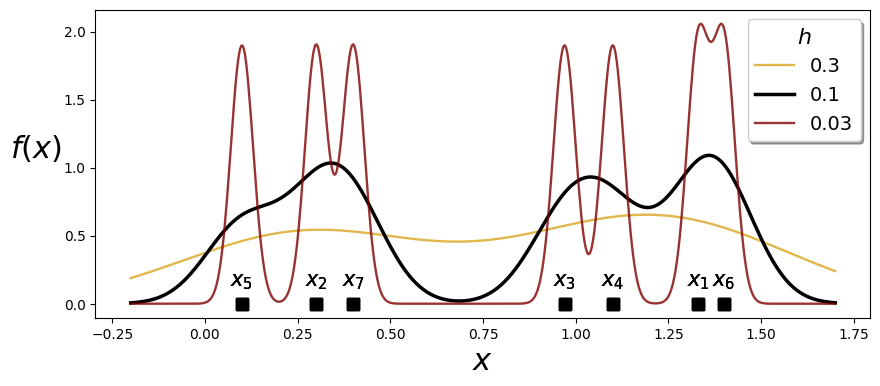

In [25]:
# plotting the KDE for a sample dataset

# sample dataset
dataset = np.array([1.33, 0.3, 0.97, 1.1, 0.1, 1.4, 0.4])
# x-value range for plotting KDEs
x_range = np.linspace(dataset.min() - 0.3, dataset.max() + 0.3, num=600)

# bandwith values for experimentation
H = [0.3, 0.1, 0.03]
n_samples = dataset.size

# line properties for different bandwith values
color_list = ["goldenrod", "black", "maroon"]
alpha_list = [0.8, 1, 0.8]
width_list = [1.7, 2.5, 1.7]

plt.figure(figsize=(10, 4))
# iterate over bandwith values
for h, color, alpha, width in zip(H, color_list, alpha_list, width_list):
    total_sum = 0
    # iterate over datapoints
    for i, xi in enumerate(dataset):
        total_sum += normal_func((x_range - xi) / h)
        plt.annotate(
            r"$x_{}$".format(i + 1),
            xy=[xi, 0.13],
            horizontalalignment="center",
            fontsize=15,
        )
    y_range = total_sum / (h * n_samples)
    # plot KDE
    plt.plot(x_range, y_range, color=color, alpha=alpha, linewidth=width, label=f"{h}")
    # plot datapoints
    plt.plot(dataset, np.zeros_like(dataset), "s", markersize=8, color="black")

plt.xlabel("$x$", fontsize=22)
plt.ylabel("$f(x)$", fontsize=22, rotation="horizontal", labelpad=20)
plt.legend(fontsize=14, shadow=True, title="$h$", title_fontsize=16)
plt.show()